In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the files
data = pd.read_csv(r"C:\Users\khushi\OneDrive\cognifyz dataset.csv")

In [6]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Explore the Dataset

In [7]:
print("Rows",data.shape[0])
print("columns",data.shape[0])

Rows 9551
columns 9551


In [8]:
# Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [9]:
# Lets seperate numeric columns and category columns

data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
data.value_counts()

Restaurant ID  Restaurant Name     Country Code  City       Address                                                              Locality                   Locality Verbose                      Longitude  Latitude   Cuisines                                  Average Cost for two  Currency            Has Table booking  Has Online delivery  Is delivering now  Switch to order menu  Price range  Aggregate rating  Rating color  Rating text  Votes
53             Amber               1             New Delhi  N-19, Connaught Place, New Delhi                                     Connaught Place            Connaught Place, New Delhi            77.220891  28.630197  North Indian, Chinese, Mughlai            1800                  Indian Rupees(Rs.)  Yes                Yes                  No                 No                    3            2.6               Orange        Average      152      1
18264996       Kream's             1             New Delhi  Shop 6, D-121, Vikaspuri, New Delhi          

In [14]:
data.shape

(9551, 21)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [23]:
data = data.dropna(subset=['Cuisines'])

In [24]:
binary_cols = [
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Switch to order menu'
]

for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

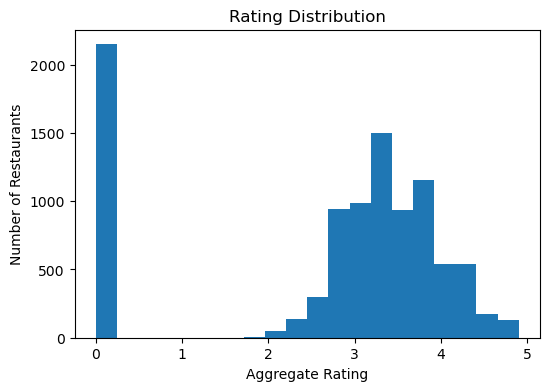

In [25]:
plt.figure(figsize=(6,4))
plt.hist(data['Aggregate rating'], bins=20)
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Rating Distribution")
plt.show()

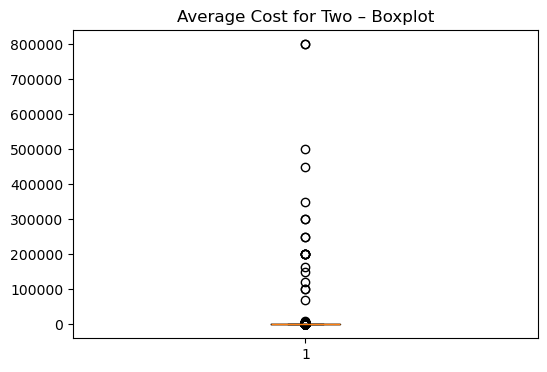

In [26]:
plt.figure(figsize=(6,4))
plt.boxplot(data['Average Cost for two'])
plt.title("Average Cost for Two – Boxplot")
plt.show()

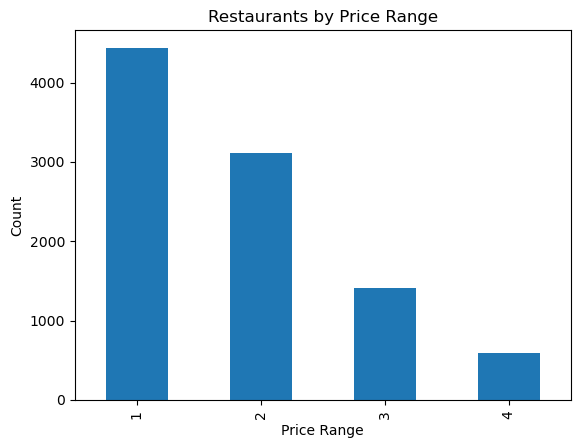

In [27]:
data['Price range'].value_counts().plot(kind='bar')
plt.title("Restaurants by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

In [28]:
data['Has Online delivery'].value_counts()

Series([], Name: count, dtype: int64)

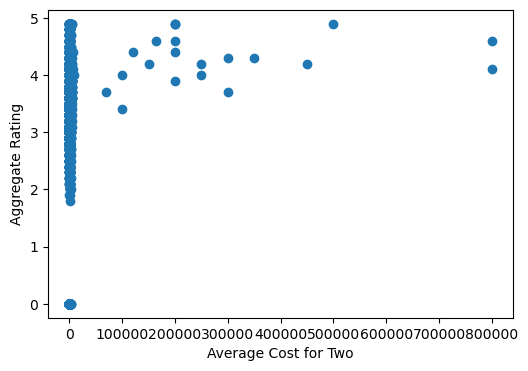

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(data['Average Cost for two'], data['Aggregate rating'])
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()

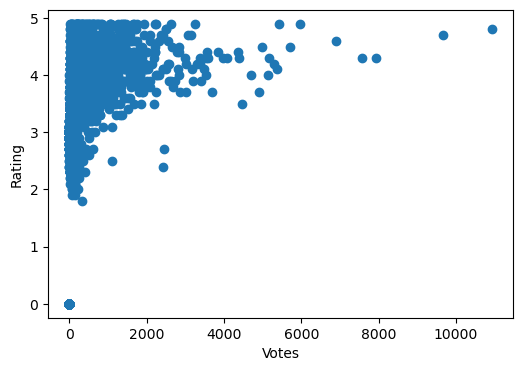

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(data['Votes'], data['Aggregate rating'])
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

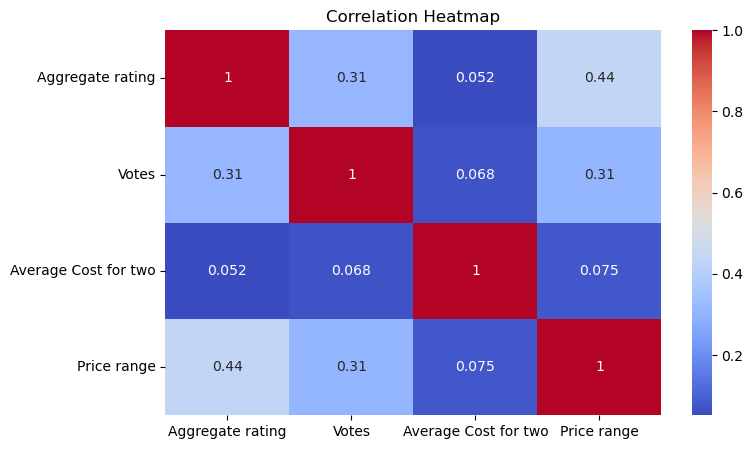

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(
    data[['Aggregate rating', 'Votes', 'Average Cost for two', 'Price range']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
from collections import Counter

all_cuisines = data['Cuisines'].str.split(',').sum()
cuisine_freq = Counter(all_cuisines)

cuisine_freq.most_common(10)

[('North Indian', 2992),
 (' Chinese', 1880),
 (' Fast Food', 1314),
 (' North Indian', 968),
 ('Chinese', 855),
 (' Mughlai', 780),
 ('Fast Food', 672),
 ('Bakery', 621),
 ('Cafe', 617),
 (' Italian', 530)]

In [34]:
from wordcloud import WordCloud
text = " ".join(all_cuisines)

wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [37]:
data['Popularity Score'] = data['Aggregate rating'] * data['Votes']

In [38]:
data['Premium Restaurant'] = data['Price range'].apply(lambda x: 1 if x >= 3 else 0)

Final Professional Conclusion

This dataset is excellent for EDA, NLP, feature engineering, and ML modeling.
It reflects real-world food-tech problems and demonstrates how data-driven decisions can improve restaurant visibility, pricing strategy, and customer satisfaction.

In [39]:
def rating_category(rating):
    if rating >= 4.0:
        return "Excellent"
    elif rating >= 3.0:
        return "Good"
    else:
        return "Poor"

data['Rating Category'] = data['Aggregate rating'].apply(rating_category)

In [40]:
features = [
    'Average Cost for two',
    'Votes',
    'Has Online delivery',
    'Has Table booking',
    'Price range'
]

X = data[features]
y = data['Rating Category']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7029858564693556
              precision    recall  f1-score   support

   Excellent       0.57      0.56      0.57       267
        Good       0.68      0.74      0.71       909
        Poor       0.79      0.71      0.75       733

    accuracy                           0.70      1909
   macro avg       0.68      0.67      0.67      1909
weighted avg       0.71      0.70      0.70      1909



In [44]:
importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
1,Votes,0.784941
0,Average Cost for two,0.156967
4,Price range,0.058092
2,Has Online delivery,0.000000
3,Has Table booking,0.000000
